<a href="https://colab.research.google.com/github/Steven-Macas/SAA/blob/main/heart_SAA_stevenMacas_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Nearest-Neighbour

Para cada uno de ellos realizar un documento de google colab con los siguientes epígrafes y tareas:


---


A Importación de librerías necesarias


---



B Preproceso

◦ Importación de los datos del dataset

◦ Mostrar las primeras y últimas filas del dataframe importado

◦ Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

◦ Mostrar un mapa de calor que indique la correlación entre variables

◦ Seleccionar las características a tener en cuenta en el estudio

◦ Separar datos entre datos de entrada y etiquetas (resultados)

◦ Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para
test)


---



C Entrenamiento y predicción

◦ Elegir, instanciar (eligiendo unos valores concretos, por ejemplo k=3 y w=’uniform’) y entrenar el modelo

◦ Realizar una predicción con los datos de prueba



---


D Evaluación

◦Para los problemas de clasificación

*   Mostrar el porcentaje de elementos correctamente clasificados
*   Mostrar la predicción realizada (imprimir la variable con la predicción)
*   Representar gráficamente la clasificación obtenida (matriz de confusión)

◦Para los problemas de regresión

*   Mostrar el error cuadrático medio (mean_squared_error)
*   Mostrar el error absoluto medio (mean_absolute_error)
*   Representar gráficamente los valores predichos con los valores reales

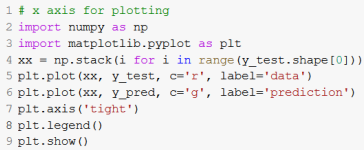

---


E Optimización de hiperparámetros

◦ Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

◦Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits = 5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

◦Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas.

◦ Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostraremos los resultados.

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del Vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos Vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el Vino en concreto en su clase de calidad (valores discretos del cero al 10)

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

3. https://www.kaggle.com/mssmartypants/paris-housing-price-prediction. Predicción de precios de las
casas de París. El dataset contiene una serie de datos de casas, como por ejemplo número de
habitaciones, año de construcción, piscina, garaje, etc. y el precio por el que se han vendido. El
objetivo es, dada una serie de parámetros, predecir el precio que debe tener la casa.

---

# **A** -Importación de librerías

In [ ]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

---


# **B** - Preproceso

In [ ]:
data = pd.read_csv('heart.csv') #Dataset del Heart



---



In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Cambiar valores

Columna sex 

M = 1

F = 2

Columna ChestPainType 

ATA = 1

NAP = 2

ASY = 3

TA = 4

Columna RestingEGC 

Normal = 1

ST = 0

LVH = 2

Columna ExerciseAngine 

N = 0

Y = 1

Columna ST_Slope 

Down = 2

Up = 1

Flat = 0

In [ ]:
data = data.replace('M', '1', regex=True)
data = data.replace('F', '2', regex=True)
data['Sex'] = pd.to_numeric(data['Sex'],errors='coerce')

data = data.replace('ATA', '1', regex=True)
data = data.replace('NAP', '2', regex=True)
data = data.replace('ASY', '3', regex=True)
data = data.replace('TA', '4', regex=True)
data['ChestPainType'] = pd.to_numeric(data['ChestPainType'],errors='coerce')

data = data.replace('Normal', '1', regex=True)
data = data.replace('ST', '0', regex=True)
data = data.replace('LVH', '2', regex=True)
data['RestingECG'] = pd.to_numeric(data['RestingECG'],errors='coerce')

data['ST_Slope'] = data['ST_Slope'].map({'Up': '0',
                                           '2lat':'1',
                                           'Down':'2',
                                           np.nan:'1'},
                                          na_action = None)
data['ST_Slope'] = pd.to_numeric(data['ST_Slope'],errors='coerce')

data = data.replace('Y', '1', regex=True)
data = data.replace('N', '0', regex=True)
data['ExerciseAngina'] = pd.to_numeric(data['ExerciseAngina'],errors='coerce')

In [ ]:
data.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object



---



In [ ]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,2.452070,132.396514,198.799564,0.233115,1.010893,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


---

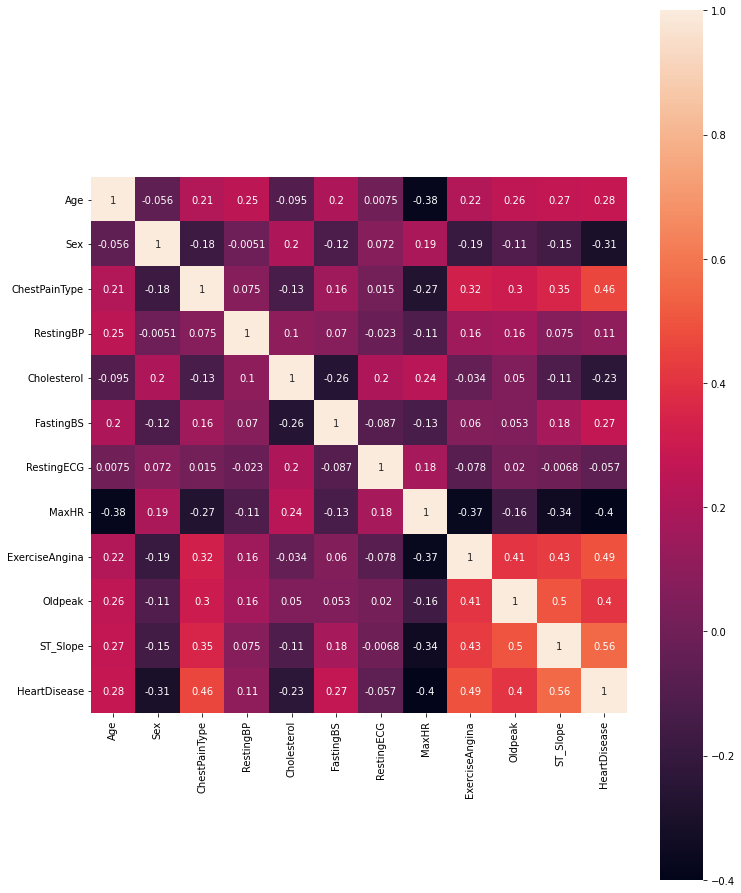

In [ ]:
#Mapa de Calor del DataFrame del Heart
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

---

**La característica que tendremos en cuenta para el estudio será la Calidad del Heart**



In [ ]:
#separamos datos de entrada y salida Heart
x_data = data.drop('HeartDisease', axis=1)
y_data = data['HeartDisease']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)

# **C** - Entrenamiento y Predicción

In [ ]:
#parámetros
k = 3 #Número de 'vecinos'
w = 'uniform'

In [ ]:
model = KNeighborsClassifier(k, weights=w) #Usamos el modelo KNN dentro de model
model.fit(x_train,y_train) #Lo entrenamos
y_predict = model.predict(x_test) #Haremos una predcción

# ***D*** - Evaluación

## **Problemas de clasificación**

In [ ]:
print(accuracy_score(y_test,y_predict)) #0.46736596736596736 - Tenemos un porcentaje del 66.62% de elementos correctamente clasificados
y_predict #Imprimos la predicción

0.6661828737300436


array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

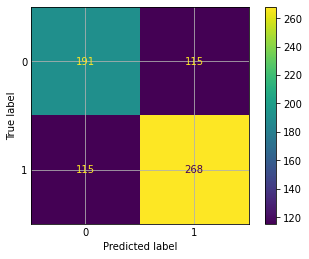

In [ ]:
#Hacemos una matriz de confusión para visualizar el desempeño del algoritmo.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

## **Problemas de regresión**

In [ ]:
model = KNeighborsRegressor(k, weights=w) #k=3 y weights='uniform'
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

### **Error cuadrático medio**

In [ ]:
print(mean_squared_error(y_predict, y_test)) #Heart

0.2502822125463635


### **Error absoluto medio**

In [ ]:
print(mean_absolute_error(y_predict, y_test))#Heart

0.36574746008708275


### **Representación gráfica**

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


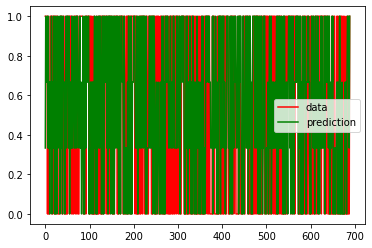

In [ ]:
A = np.stack(i for i in range(y_test.shape[0]))
plt.plot(A,y_test, c='r', label = 'data')
plt.plot(A,y_predict, c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()



---

# **E** - Optimización de hiperparámetros

## **Combinación de parámetros óptima**

## Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

In [ ]:
#Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =5).
#Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)),
#como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

opt_uniform = 0
opt_distance = 0
k_opt_uniform = 1
k_opt_distance = 1

for i in range(1,31):
  k = i
  w1 = 'uniform'
  w2 = 'distance'

  resultados_prob = []
  kf = KFold(n_splits=5) #Indicamos que se repetirá 5 veces
  for train, test in kf.split(x_train):
    model = KNeighborsClassifier(k, weights=w1)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_uniform = accuracy_score(y_test,y_predict)
    resultados_prob.append(porcentage_uniform) #Guardamos el porcentaje para hacer la media y tener un menor margen de error
  media_prob = np.mean(resultados_prob)

  if media_prob > opt_uniform:
    opt_uniform = media_prob
    k_opt_uniform = k
  
  resultados_prob.clear()
  media_prob = 0
  kf = KFold(n_splits=5)
  for train, test in kf.split(x_train):
    model = KNeighborsClassifier(k, weights=w2)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_distance = accuracy_score(y_test,y_predict)
    resultados_prob.append(porcentage_distance)
  media_prob = np.mean(resultados_prob)
  if media_prob > opt_distance:
    opt_distance = media_prob
    k_opt_distance = k
  resultados_prob.clear()
  media_prob = 0

In [ ]:
#Imprimimos la mejor combinación tanto uniform/distance que tenemos a la hora de tener en cuenta el numero K
print(k_opt_distance)
k_opt_uniform

28


29

### Imprimimos la probabilidad de acierto tanto de uniform como distance

In [ ]:
opt_distance

0.7053701015965167

In [ ]:
opt_uniform

0.7169811320754716

## Parámetros óptimos obtenidos

In [ ]:
#aplicamos los datos obtenidos al problema en cuestión
modelo_final = KNeighborsClassifier(n_neighbors=16, weights="distance")
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)
modelo_final.fit(x_train, y_train)
y_predict = modelo_final.predict(x_test)
porcentage = accuracy_score(y_test, y_predict)

# Error cuadrático medio
squared_error = mean_squared_error(y_test, y_predict)
# Error absoluto medio
absolute_error = mean_absolute_error(y_test, y_predict)

print('Estos son los resultados')
print('------------------------')
print('Porcentaje: ', round(porcentage,3))
print('Error cuadrático medio: ', round(squared_error,3))
print('Error absoluto medio: ', round(absolute_error,3))

Estos son los resultados
------------------------
Porcentaje:  0.701
Error cuadrático medio:  0.299
Error absoluto medio:  0.299


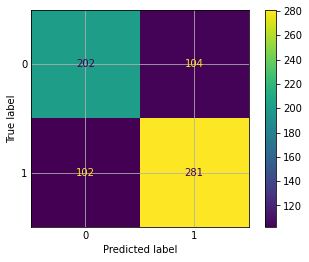

In [ ]:
#Volvemos hacer una matriz de confusión para ver el desempeño del algoritmo
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)